# Downloading the dataset

### Automatic installation:

1. Download kaggle api token
   - Go to https://www.kaggle.com/settings/account and scroll until you see 'Create New Token'
2. Move kaggle.json to ~/.kaggle
   - Run command `mv kaggle.json ~/.kaggle && chmod 600 ~/.kaggle/kaggle.json`
3. Join competition
   - Go to https://www.kaggle.com/competitions/widsdatathon2025/data and join competition

### Manual installation:

1. Join competition
   - Go to https://www.kaggle.com/competitions/widsdatathon2025/data and join competition
2. Download dataset
3. Unzip and move contents to `./data` directory


In [141]:
import os

DATA_DIR = './data'
COMPETITION_NAME = 'widsdatathon2025'

if not os.path.isdir(DATA_DIR):
    import kaggle
    import zipfile

    kaggle.api.authenticate()
    kaggle.api.competition_download_files(competition=COMPETITION_NAME)
    
    zip_path = f'{COMPETITION_NAME}.zip'
    with zipfile.ZipFile(zip_path, 'r') as zip:
        zip.extractall(DATA_DIR)
    os.remove(zip_path)

In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

TRAIN_DIR = DATA_DIR + '/TRAIN_NEW'

categorical_df = pd.read_excel(TRAIN_DIR + '/TRAIN_CATEGORICAL_METADATA_new.xlsx')
quantitative_df = pd.read_excel(TRAIN_DIR + '/TRAIN_QUANTITATIVE_METADATA_new.xlsx')
connectome_df = pd.read_csv(TRAIN_DIR + '/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv')

In [143]:
print('categorical:\n', categorical_df.drop(columns=['participant_id']).columns)
print('quantitative:\n', quantitative_df.drop(columns=['participant_id']).columns)

categorical:
 Index(['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')
quantitative:
 Index(['EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP',
       'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD',
       'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems',
       'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
       'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact',
       'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing',
       'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan'],
      dtype='object')


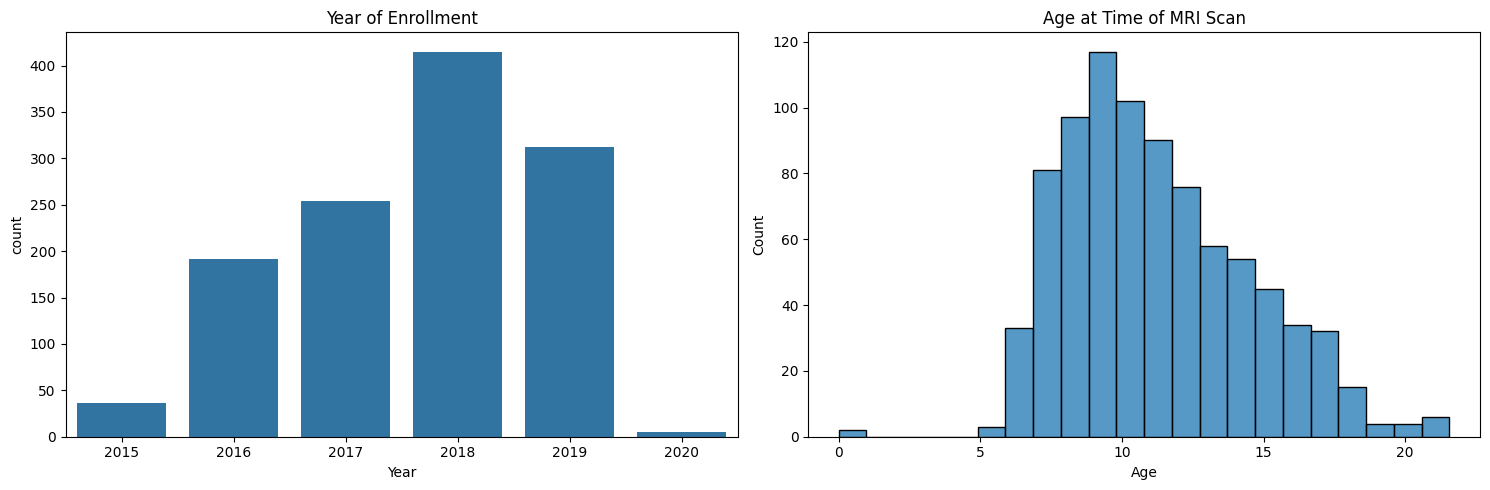

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = iter(axes)

ax = next(axes)
ax.set_title('Year of Enrollment')
sns.countplot(x='Basic_Demos_Enroll_Year', data=categorical_df, ax=ax)
ax.set_xlabel('Year')

ax = next(axes)
ax.set_title('Age at Time of MRI Scan')
sns.histplot(quantitative_df['MRI_Track_Age_at_Scan'], ax=ax)
ax.set_xlabel('Age')

fig.tight_layout()

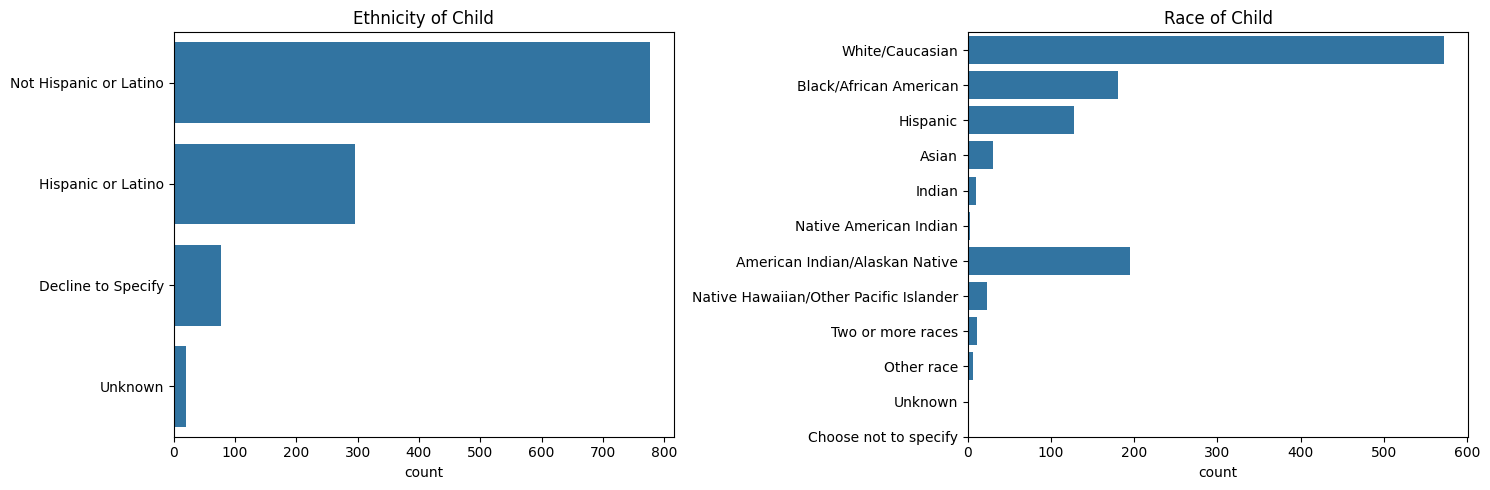

In [145]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = iter(axes)

ax = next(axes)
ethnicity_labels = ['Not Hispanic or Latino', 'Hispanic or Latino', 'Decline to Specify', 'Unknown']
ax.set_title('Ethnicity of Child')
sns.countplot(y='PreInt_Demos_Fam_Child_Ethnicity', data=categorical_df, ax=ax)
ax.set_yticks(range(len(ethnicity_labels)))
ax.set_yticklabels(ethnicity_labels)
ax.set_ylabel(None)

ax = next(axes)
race_labels = [
    'White/Caucasian',
    'Black/African American',
    'Hispanic',
    'Asian',
    'Indian',
    'Native American Indian',
    'American Indian/Alaskan Native',
    'Native Hawaiian/Other Pacific Islander',
    'Two or more races',
    'Other race',
    'Unknown',
    'Choose not to specify'
]
ax.set_title('Race of Child')
sns.countplot(y='PreInt_Demos_Fam_Child_Race', data=categorical_df, ax=ax)
ax.set_yticks(range(len(race_labels)))
ax.set_yticklabels(race_labels)
ax.set_ylabel(None)

fig.tight_layout()

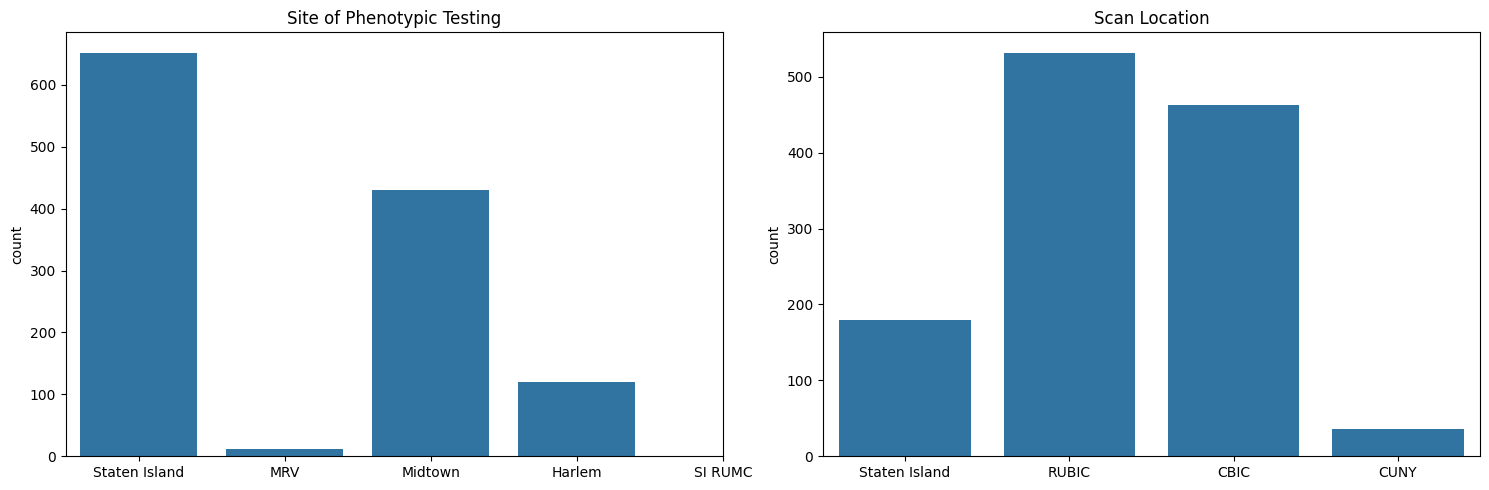

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = iter(axes)

ax = next(axes)
testing_site_labels = ["Staten Island", "MRV", "Midtown", "Harlem", "SI RUMC"]
ax.set_title('Site of Phenotypic Testing')
sns.countplot(x='Basic_Demos_Study_Site', data=categorical_df, ax=ax)
ax.set_xticks(range(len(testing_site_labels)))
ax.set_xticklabels(testing_site_labels)
ax.set_xlabel(None)

ax = next(axes)
scan_location_labels = ["Staten Island", "RUBIC", "CBIC", "CUNY"]
ax.set_title('Scan Location')
sns.countplot(x='MRI_Track_Scan_Location', data=categorical_df, ax=ax)
ax.set_xticks(range(len(scan_location_labels)))
ax.set_xticklabels(scan_location_labels)
ax.set_xlabel(None)

fig.tight_layout()

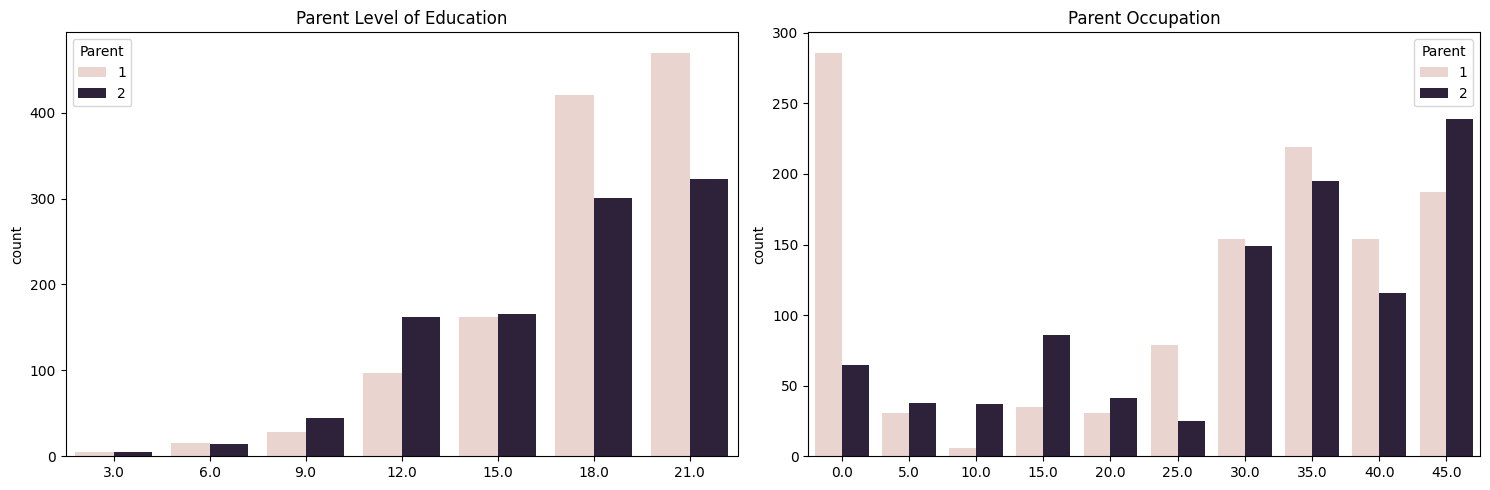

In [176]:
parent_edu_df = categorical_df.melt(
    value_vars=['Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P2_Edu'],
    var_name="Parent", value_name="Education Level"
)

parent_occ_df = categorical_df.melt(
    value_vars=['Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Occ'],
    var_name="Parent", value_name="Occupation"
)

parent_edu_df["Parent"] = parent_edu_df["Parent"].map({"Barratt_Barratt_P1_Edu": 1,"Barratt_Barratt_P2_Edu": 2,})
parent_occ_df["Parent"] = parent_occ_df["Parent"].map({"Barratt_Barratt_P1_Occ": 1, "Barratt_Barratt_P2_Occ": 2})

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = iter(axes)

ax = next(axes)
ax.set_title("Parent Level of Education")
sns.countplot(x='Education Level', hue='Parent', data=parent_edu_df, ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title("Parent Occupation")
sns.countplot(x='Occupation', hue='Parent', data=parent_occ_df, ax=ax)
ax.set_xlabel(None)

fig.tight_layout()